# Generalized Linear Models

### Linear Regression

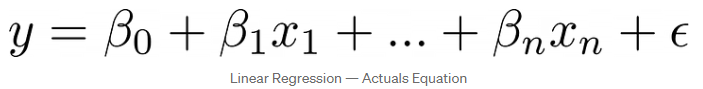

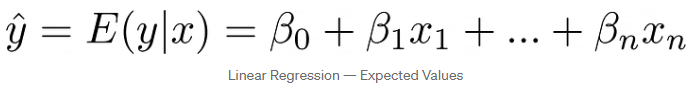

* The value $\hat{y}$ you get from the model is the mean (expected value) of y given x i.e. E(y|x)
  * For massive datasets, for each value of x, there will be multiple values of y
  * The model will predict the expected value of y for each one of these x values
  * The model expects the remaining y's to be normally distributed

In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Create dataset

* For each value of x, we have multiple y values

In [2]:
x = [[1], [1], [2], [2]]
y = [9, 11, 19, 21]

### Fit a Linear Regression model

In [20]:
linear = LinearRegression()
linear.fit(x, y)
linear_coef = linear.coef_ * x + linear.intercept_

print(f"Predicted y given that x=1: {linear.predict([[1]])} which is the mean of 9 and 11")
print(f"Predicted y given that x=2: {linear.predict([[2]])} which is the mean of 19 and 21")


Predicted y given that x=1: [10.] which is the mean of 9 and 11
Predicted y given that x=2: [20.] which is the mean of 19 and 21


In [ ]:
# Datapoints
plt.scatter

ax1.scatter(X[:, 0], y, alpha=0.5, c='tab:orange')
ax2.scatter(X[:, 1], y, alpha=0.5, c='tab:green')

# Best fit line
ax1.plot(X[:, 0], huber_coef[:, 0], color='chocolate', label="Huber regression (X1)")
ax1.plot(X[:, 0], linear_coef[:, 0], color='orange', label="Linear regression (X1)")
ax2.plot(X[:, 1], huber_coef[:, 1], color='green', label="Huber regression (X2)")
ax2.plot(X[:, 1], linear_coef[:, 1], color='limegreen', label="Linear regression (X2)")
fig.legend(bbox_to_anchor=(1.13, 0.88), borderaxespad=0)
plt.show()

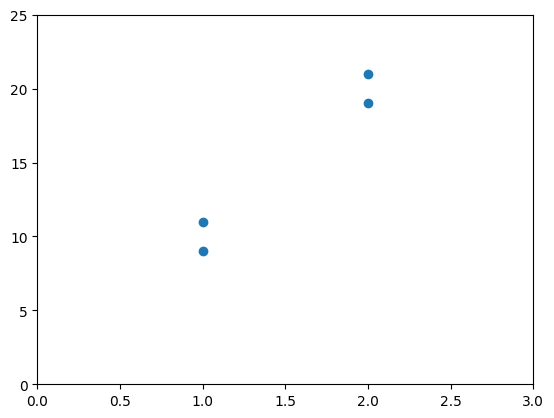

In [18]:
plt.scatter(x, y)
plt.xlim([0, 3])
plt.ylim([0, 25])
plt.show()

In [19]:
linear_coef = linear.coef_ * x + linear.intercept_

array([[10.],
       [10.],
       [20.],
       [20.]])